<a href="https://colab.research.google.com/github/AnaadiRumpal/Dog-Breed-Identification-with-Deep-Learning-by-using-a-convolutional-neural-network-CNN-model-/blob/main/RottenFruitDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive with this Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Link Kaggle into Drive and download dataset

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [6]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.57G/3.58G [00:43<00:00, 92.1MB/s]
100% 3.58G/3.58G [00:44<00:00, 87.3MB/s]


In [7]:
%ls

fruits-fresh-and-rotten-for-classification.zip  gdrive/  sample_data/


## Unzip Dataset

In [8]:
!unzip fruits-fresh-and-rotten-for-classification.zip.zip && rm fruits-fresh-and-rotten-for-classification.zip

unzip:  cannot find or open fruits-fresh-and-rotten-for-classification.zip.zip, fruits-fresh-and-rotten-for-classification.zip.zip.zip or fruits-fresh-and-rotten-for-classification.zip.zip.ZIP.


In [9]:
!unzip fruits-fresh-and-rotten-for-classification

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [10]:
!pwd

/content


In [11]:
%cd dataset

/content/dataset


## Optional : File already in Drive

Access dataset in drive after mount the drive in Colab, then copy dataset from drive to Colab content

In [12]:
%pwd

'/content/dataset'

In [18]:
import shutil
shutil.move("/content/gdrive/My Drive/Kaggle/dataset", "/content")

Error: Destination path '/content/dataset' already exists

## Data Preparation

In [33]:
import os

train_dir = 'dataset/dataset/train'
test_dir = 'dataset/dataset/test'


In [45]:
%ls
%cd content


bin@                        dev/    lib64@                    opt/                run/   tools/
boot/                       etc/    libx32@                   proc/               sbin@  usr/
content/                    home/   media/                    python-apt/         srv/   var/
cuda-keyring_1.0-1_all.deb  lib@    mnt/                      python-apt.tar.xz*  sys/
datalab/                    lib32@  NGC-DL-CONTAINER-LICENSE  root/               tmp/
/content


In [46]:
%ls


dataset/  fruits-fresh-and-rotten-for-classification.zip  gdrive/  sample_data/


In [47]:
#Train dataset

fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')

In [48]:
#Test dataset
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

In [49]:
train_freshapples_filenames = os.listdir(fresh_apples_train_dir)
train_freshbanana_filenames = os.listdir(fresh_banana_train_dir)
train_freshoranges_filenames = os.listdir(fresh_oranges_train_dir)
train_rottenapples_filenames = os.listdir(rotten_apples_train_dir)
train_rottenbanana_filenames = os.listdir(rotten_banana_train_dir)
train_rottenoranges_filenames = os.listdir(rotten_oranges_train_dir)

test_freshapples_filenames = os.listdir(fresh_apples_test_dir)
test_freshbanana_filenames = os.listdir(fresh_banana_test_dir)
test_freshoranges_filenames = os.listdir(fresh_oranges_test_dir)
test_rottenapples_filenames = os.listdir(rotten_apples_test_dir)
test_rottenbanana_filenames = os.listdir(rotten_banana_test_dir)
test_rottenoranges_filenames = os.listdir(rotten_oranges_test_dir)

print("Number of training fresh apple image : ", len(train_freshapples_filenames))
print("Number of training fresh banana image : ", len(train_freshbanana_filenames))
print("Number of training fresh orange image : ", len(train_freshoranges_filenames))
print("Number of training rotten apple image : ", len(train_rottenapples_filenames))
print("Number of training rotten banana image : ", len(train_rottenbanana_filenames))
print("Number of training rotten orange image : ", len(train_rottenoranges_filenames))

print("Number of test fresh apple image : ", len(test_freshapples_filenames))
print("Number of test fresh banana image : ", len(test_freshbanana_filenames))
print("Number of test fresh orange image : ", len(test_freshoranges_filenames))
print("Number of test rotten apple image : ", len(test_rottenapples_filenames))
print("Number of test rotten banana image : ", len(test_rottenbanana_filenames))
print("Number of test rotten orange image : ", len(test_rottenoranges_filenames))


Number of training fresh apple image :  1693
Number of training fresh banana image :  1581
Number of training fresh orange image :  1466
Number of training rotten apple image :  2342
Number of training rotten banana image :  2224
Number of training rotten orange image :  1595
Number of test fresh apple image :  395
Number of test fresh banana image :  381
Number of test fresh orange image :  388
Number of test rotten apple image :  601
Number of test rotten banana image :  530
Number of test rotten orange image :  403


Take a look of picture in dataset. We'll output image in 4x4

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameter graph
n_rows = 4
n_cols = 4
iterating_index = 0

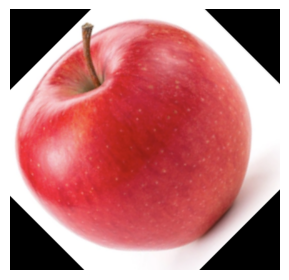

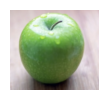

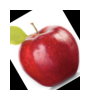

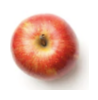

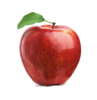

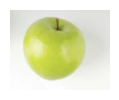

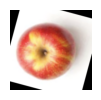

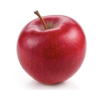

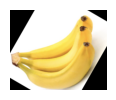

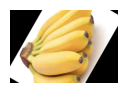

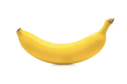

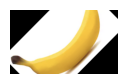

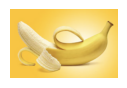

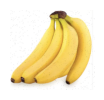

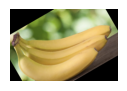

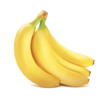

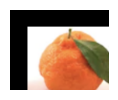

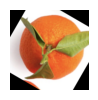

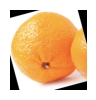

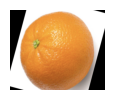

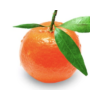

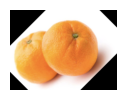

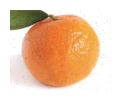

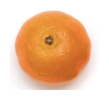

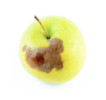

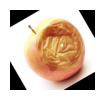

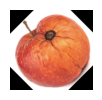

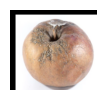

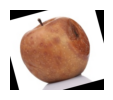

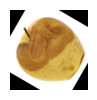

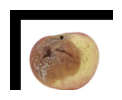

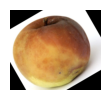

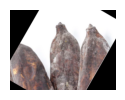

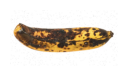

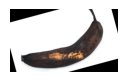

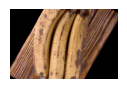

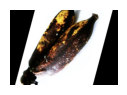

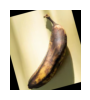

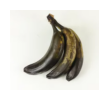

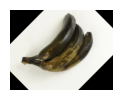

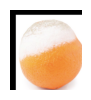

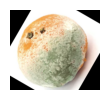

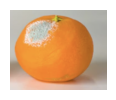

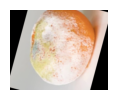

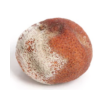

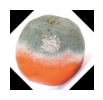

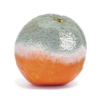

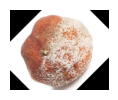

In [51]:
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

iterating_index += 8

next_freshapples_pix = [os.path.join(fresh_apples_train_dir, fname)
                for fname in train_freshapples_filenames[iterating_index-8:iterating_index]
               ]

next_freshbanana_pix = [os.path.join(fresh_banana_train_dir, fname)
                for fname in train_freshbanana_filenames[iterating_index-8:iterating_index]
               ]

next_freshoranges_pix = [os.path.join(fresh_oranges_train_dir, fname)
                for fname in train_freshoranges_filenames[iterating_index-8:iterating_index]
               ]

next_rottenapples_pix = [os.path.join(rotten_apples_train_dir, fname)
                for fname in train_rottenapples_filenames[iterating_index-8:iterating_index]
               ]

next_rottenbanana_pix = [os.path.join(rotten_banana_train_dir, fname)
                for fname in train_rottenbanana_filenames[iterating_index-8:iterating_index]
               ]

next_rottenoranges_pix = [os.path.join(rotten_oranges_train_dir, fname)
                for fname in train_rottenoranges_filenames[iterating_index-8:iterating_index]
               ]
enum1 = next_freshapples_pix + next_freshbanana_pix
enum2 = next_freshoranges_pix + next_rottenapples_pix
enum3 = next_rottenbanana_pix + next_rottenoranges_pix
def showImage(enum):
  for i, img_path in enumerate(enum):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

showImage(enum1)
showImage(enum2)
showImage(enum3)

## Data Preprocessing

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )

validation_generator = val_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


## Build a model

In [53]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks

In [54]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,497,126 (36.23 MB)

 Trainable params: 9,497,126 (36.23 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

## Training Data

In [58]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 98s - 982ms/step - acc: 0.3125 - loss: 2.0056 - val_acc: 0.4720 - val_loss: 1.2723
Epoch 2/100
100/100 - 92s - 924ms/step - acc: 0.4639 - loss: 1.3329 - val_acc: 0.5520 - val_loss: 1.0639
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 97s - 971ms/step - acc: 0.5470 - loss: 1.1177 - val_acc: 0.6791 - val_loss: 0.7997
Epoch 4/100
100/100 - 92s - 917ms/step - acc: 0.6675 - loss: 0.8699 - val_acc: 0.7570 - val_loss: 0.6533
Epoch 5/100
100/100 - 86s - 860ms/step - acc: 0.7125 - loss: 0.7658 - val_acc: 0.7990 - val_loss: 0.5527
Epoch 6/100
100/100 - 44s - 442ms/step - acc: 0.7511 - loss: 0.6586 - val_acc: 0.6791 - val_loss: 0.8370
Epoch 7/100
100/100 - 88s - 882ms/step - acc: 0.7645 - loss: 0.6681 - val_acc: 0.6500 - val_loss: 0.9433
Epoch 8/100
100/100 - 88s - 881ms/step - acc: 0.7730 - loss: 0.6213 - val_acc: 0.8770 - val_loss: 0.3462
Epoch 9/100
100/100 - 92s - 922ms/step - acc: 0.8010 - loss: 0.5426 - val_acc: 0.8911 - val_loss: 0.3174
Epoch 10/100
100/100 - 87s - 874ms/step - acc: 0.8205 - loss: 0.4999 - val_acc: 0.8790 - val_loss: 0.3454
Epoch 11/100
100/100 - 86s - 864ms/step - acc: 0.8198 - loss: 0.4920 - val_acc: 0.8920 - val_loss: 0.2963
Epoch 12/100
100/100 - 42s - 415ms/step - acc: 0.8435 - loss: 0.4

## Evaluate Accuracy and Loss

Text(0.5, 1.0, 'Training and validation loss')

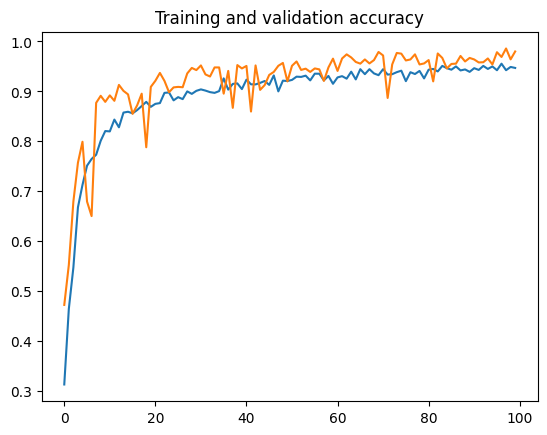

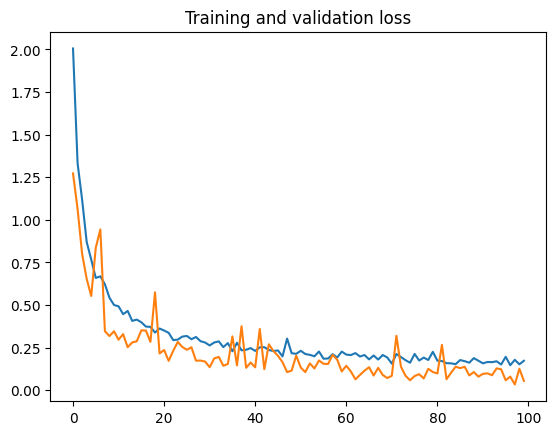

In [59]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [61]:
result = model.evaluate(validation_generator, steps=50)
print('Accuracy of this model : ', result[1])

50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - acc: 0.9695 - loss: 0.0670
Accuracy of this model :  0.9769999980926514


## Run the model

In [65]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0][0]==1:
    prediction = 'fresh apple'
  elif classes[0][1]==1:
    prediction = 'fresh banana'
  elif classes[0][2]==1:
    prediction = 'fresh orange'
  elif classes[0][3]==1:
    prediction = 'rotten apple'
  elif classes[0][4]==1:
    prediction = 'rotten banana'
  elif classes[0][5]==1:
    prediction = 'rotten orange'
print('{} is a {}'.format(fn,prediction))

Saving Screenshot 2024-11-21 021041.png to Screenshot 2024-11-21 021041.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Screenshot 2024-11-21 021041.png is a rotten apple


## Save the Model

Save model into .pb

In [66]:
import tensorflow as tf

model_version = "1"
model_name = "fresh-rotten-model"
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

In [69]:
model.save('rotten_detection.h5')

Saved into .h5

In [67]:
model.save("fresh-rotten-model.h5")

Download zipped file model.pb

In [68]:
shutil.make_archive('fresh-rotten-model', 'zip', 'fresh-rotten-model')

'/content/fresh-rotten-model.zip'

## Clean up kernel

In [ ]:
import os, signal

os.kill(     os.getpid() ,
         signal.SIGKILL
       )